### Image Rotation Correction and Data Augmentation in CIFAR-10 with Model Training and Evaluation. 

This mini-project explores two key aspects of preparing image data for Convolutional Neural Networks (CNNs) using the CIFAR-10 dataset, coupled with training and evaluating CNN models to understand the impact of these data preparation steps on model performance. We leverage the PyTorch framework and its torchvision library for data manipulation and model development.

1. Data Preprocessing to Correct Image Rotation
In this section, we address the challenge of image rotation by simulating a preprocessing step to correct the orientation of images. Given the variability in image capture conditions, it's common for datasets to include images at various rotations, which can affect model training and accuracy. To simplify, we bypass explicit rotation detection and assume a fixed angle correction is needed for all images, which can later be enhanced to incorporate dynamic angle detection using methods like edge detection or line analysis.

2. Data Augmentation to Include Rotated Versions
To enhance model robustness and generalization, we augment the training dataset by introducing additional images that are randomly rotated within a specified range (-30 to 30 degrees). This step is facilitated by torchvision's transformation utilities, allowing for on-the-fly augmentation that introduces variability without altering the underlying dataset.

3. Building and Training CNN Models
Following data preparation, we design a simple CNN architecture tailored for the CIFAR-10 dataset. The model training process includes both the original (unaugmented) and augmented datasets to highlight the effects of data augmentation. This comparative training approach helps illustrate the augmentation's role in improving model resilience against variations in new, unseen data.

4. Evaluating Model Performance
Post-training, we evaluate each CNN model on a separate test set to gauge their performance and ability to generalize. This evaluation provides insights into the benefits of preprocessing and augmentation steps, showcasing their impact through empirical performance metrics.

In [4]:
# Import Libraries

import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# Transformation pipeline for preprocessing and augmentation

# Transformations for the original dataset (unaugmented)
transform_original = transforms.Compose([
    transforms.ToTensor(),
])

# Transformations for the augmented dataset
transform_augmented = transforms.Compose([
    # Preprocessing: Correct rotation (assuming a fixed angle for demonstration)
    transforms.RandomRotation(degrees=(90)),  # Replace 90 with the angle needed for correction
    # Augmentation: Include rotated versions in the training data
    transforms.RandomRotation(degrees=(-30, 30)),  # Random rotation between -30 and 30 degrees
    transforms.ToTensor(),
])

In [6]:
# Loading the original CIFAR-10 dataset
trainset_original = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_original)
# Prepare a DataLoader for batching the images
trainloader_original = DataLoader(trainset_original, batch_size=64, shuffle=True)

# Loading the augmeneted CIFAR-10 dataset and apply the transformations.
# Note that we're applying the transformations on-the-fly — to each image in the CIFAR-10 dataset as it's loaded — 
# by specifying the transform argument in the datasets.CIFAR10 call in PyTorch
trainset_augmented = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_augmented)
trainloader_augmented = DataLoader(trainset_augmented, batch_size=64, shuffle=True)


100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [7]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize pixel values from [-1, 1] back to [0, 1]
    npimg = img.numpy() # converts the PyTorch tensor img into a NumPy array npimg
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # expects a NumPy array or a similar array-like structure
    plt.show()

# Get some random augmented training images
dataiter = iter(trainloader_augmented)
images, labels = next(dataiter)

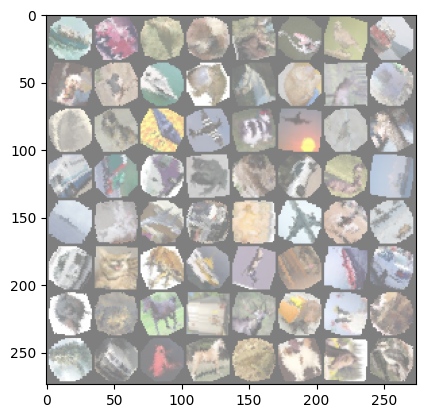

In [8]:
# Show some augmented images
# Since img contains a batch of images, torchvision.utils.make_grid is used 
# to arrange the batch in a grid format, making it easier to visualize multiple images at once.
imshow(torchvision.utils.make_grid(images))

In [9]:
# Define a simple CNN model suitable for CIFAR-10

import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = SimpleCNN()


In [14]:
# Define the Training Function
# to encapsulate the training loop, making it easy to train on both datasets

def train_model(net, trainloader, epochs=10):
    # For CIFAR-10, CrossEntropyLoss is a common choice, and Adam is a robust optimizer for starting
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 100 == 99:
                print(f'Epoch: {epoch + 1}, Batch: {i + 1}, Loss: {running_loss / 100:.3f}')
                running_loss = 0.0

    print('Finished Training')


In [11]:
# Training on Unaugmented Data

print("Training on Unaugmented Data:")
net_original = SimpleCNN()
train_model(net_original, trainloader_original)


Training on Unaugmented Data:
Finished Training


In [15]:
# Training on Augmented Data

print("\nTraining on Augmented Data:")
net_augmented = SimpleCNN()
train_model(net_augmented, trainloader_augmented)



Training on Augmented Data:
Epoch: 1, Batch: 100, Loss: 2.122
Epoch: 1, Batch: 200, Loss: 1.906
Epoch: 1, Batch: 300, Loss: 1.806
Epoch: 1, Batch: 400, Loss: 1.744
Epoch: 1, Batch: 500, Loss: 1.682
Epoch: 1, Batch: 600, Loss: 1.661
Epoch: 1, Batch: 700, Loss: 1.647
Epoch: 2, Batch: 100, Loss: 1.592
Epoch: 2, Batch: 200, Loss: 1.545
Epoch: 2, Batch: 300, Loss: 1.540
Epoch: 2, Batch: 400, Loss: 1.513
Epoch: 2, Batch: 500, Loss: 1.491
Epoch: 2, Batch: 600, Loss: 1.478
Epoch: 2, Batch: 700, Loss: 1.477
Epoch: 3, Batch: 100, Loss: 1.436
Epoch: 3, Batch: 200, Loss: 1.426
Epoch: 3, Batch: 300, Loss: 1.410
Epoch: 3, Batch: 400, Loss: 1.382
Epoch: 3, Batch: 500, Loss: 1.374
Epoch: 3, Batch: 600, Loss: 1.381
Epoch: 3, Batch: 700, Loss: 1.374
Epoch: 4, Batch: 100, Loss: 1.338
Epoch: 4, Batch: 200, Loss: 1.315
Epoch: 4, Batch: 300, Loss: 1.320
Epoch: 4, Batch: 400, Loss: 1.316
Epoch: 4, Batch: 500, Loss: 1.323
Epoch: 4, Batch: 600, Loss: 1.308
Epoch: 4, Batch: 700, Loss: 1.302
Epoch: 5, Batch: 10

In [16]:
# Defining the Evaluation Function

def evaluate_model(net, testloader):
    net.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No need to track gradients for evaluation
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on the test set: {accuracy:.2f}%')
    return accuracy

In [17]:
# Loading the test CIFAR-10 dataset
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
# Setting Up the Test DataLoader
testloader = DataLoader(testset, batch_size=64, shuffle=False)

Files already downloaded and verified


In [18]:
# Evaluating Both Models

# Evaluate the model trained on unaugmented data
print("Evaluating the model trained on Unaugmented Data:")
evaluate_model(net_original, testloader)

# Evaluate the model trained on augmented data
print("\nEvaluating the model trained on Augmented Data:")
evaluate_model(net_augmented, testloader)

Evaluating the model trained on Unaugmented Data:
Accuracy on the test set: 74.40%

Evaluating the model trained on Augmented Data:
Accuracy on the test set: 64.42%


64.42

The results we obtained — 74.40% accuracy for the Unaugmented model, 64.42% for the Augmented one — might seem counterintuitive at first, as data augmentation is generally expected to enhance model generalization and performance on unseen data. However, there are several factors to consider that might explain these results:

* Augmentation Complexity: The type and extent of augmentation applied might not be optimal for the CIFAR-10 dataset. Over-augmenting the data or using augmentations that introduce too much variability can sometimes make the learning task unnecessarily difficult, leading to lower performance.

* Specificity of Augmentation: The chosen augmentation method (random rotation in this case) might not be the most beneficial for this particular dataset or task. Different augmentation strategies (e.g., random cropping, flipping, or color jittering) might yield better results.

* Model Capacity: The model architecture might not have enough capacity (i.e., it might be too simple) to learn from the more complex augmented dataset effectively. A more complex or deeper model might be able to leverage the augmented data better.

* Training Regimen: The training duration, learning rate, and other hyperparameters might not have been ideal for the augmented dataset. Augmented data often requires longer training times or different optimization strategies to converge.

* Evaluation Metric: Accuracy alone might not fully capture the model's performance improvements due to augmentation, especially if the test set contains examples that are more similar to the unaugmented training data. Other metrics like confusion matrices, precision, recall, or F1 scores might provide additional insights.